## Aggregations:Min, Max, and Everything in Between

Often when we faced with a large amount of data, a first step is to compute summay statistics for the data in question. Perhaps the most common summery statistics are the mean and standard diviation, which allow you ot summarize the 'typical' values in the dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc).

NumPy has fast built-in aggergation functions for working on arrays:
Some of them are:

### 1. Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array. Python itself can do this using the build-in sum function:

In [1]:
import numpy as np

In [9]:
l = np.random.random(100)

l

array([0.40250173, 0.73403941, 0.94950397, 0.95448414, 0.69914126,
       0.47959358, 0.22925696, 0.02175017, 0.70480367, 0.40277399,
       0.26632241, 0.42849745, 0.87512073, 0.04220192, 0.44543424,
       0.19842722, 0.42116654, 0.6701874 , 0.60164152, 0.2406039 ,
       0.87987523, 0.47610221, 0.42483607, 0.61004331, 0.78360002,
       0.42474541, 0.23583441, 0.9390949 , 0.93853744, 0.2428931 ,
       0.78389181, 0.00752434, 0.01250229, 0.48887673, 0.21034153,
       0.35672643, 0.12273822, 0.99705706, 0.26585877, 0.5316135 ,
       0.11943299, 0.41837462, 0.23675804, 0.75899114, 0.78699586,
       0.47887132, 0.36722634, 0.78982674, 0.32024154, 0.7936581 ,
       0.48821895, 0.51236734, 0.28453332, 0.97013588, 0.82189953,
       0.08576057, 0.59975393, 0.95727302, 0.87160927, 0.6996236 ,
       0.65098227, 0.88258228, 0.55808217, 0.69461769, 0.44254894,
       0.91634493, 0.29801234, 0.14005769, 0.87958217, 0.89820466,
       0.81371888, 0.97643516, 0.94490364, 0.36839677, 0.47666

In [10]:
sum(l)

54.76601410893911

> The syntax is quite sumilar to that of NumPy's sum function, and the result is the same in the simplest case:

In [11]:
np.sum(l)

54.766014108939125

In large calculations, NumPy's version of the operation is computed much more quickly:

In [12]:
big_array = np.random.rand(10000000)

%timeit sum(big_array)

%timeit np.sum(big_array)

1.18 s ± 74.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
15.7 ms ± 717 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 2. Minimum and Maximum

Similarly, Python has built-in min and max functions, used to dind the minimum value and maximum value of any given array:

In [13]:
min(big_array), max(big_array)

(3.7778915107367084e-08, 0.9999999848171117)

NumPy's have similar syntex, and operate much quickly

In [14]:
np.min(big_array), np.max(big_array)

(3.7778915107367084e-08, 0.9999999848171117)

In [15]:
# to see the executation time of both

%timeit min(big_array)

%timeit np.min(big_array)

767 ms ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.12 ms ± 57.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


For min, max, sum and several other NumPy aggregates, a shorter syntax is to use methods of the array object itslef:

In [16]:
print(big_array.min(), big_array.max(), big_array.sum())

3.7778915107367084e-08 0.9999999848171117 5000541.556945192


### 3. Multidimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.

Say you have some data stored in a two-dimensional array:

In [23]:
M = np.arange(12).reshape(3, 4)

M

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

By default, each NumPy aggregation funciton will return the aggregate over the entire array:

In [24]:
M.sum()

66

Aggregation functions take an additional arguments specifying the axis. 0 refers to x-axis and 1 refers to y-axis:

In [28]:
M.min(axis=0), M.min(axis=1)

(array([0, 1, 2, 3]), array([0, 4, 8]))

### 4. Other aggregation functions

![Numpy's Aggregate functions](../../Pictures/NumPy's%20aggergates.png)

# Example: What is the Average Height of Us Presidents?

Aggregates available in NumPy can be extermely useful for summerizing a set of values. As a simple example, let's consider the heights of all US presidents.

In [35]:
heights = [189, 170, 189, 163, 183, 171, 185, 168, 173,
           183, 173, 173, 175, 178, 183, 193, 178, 173,
           174, 183, 183, 168, 170, 178, 182, 180, 183,
           178, 182, 188, 175, 179, 183, 193, 182, 183,
           177, 185, 188, 188, 182, 185]

heights = np.array(heights)
# lets see summary statistics.

print("mean height: ", heights.mean())
print("standard diviation:  ", heights.std())
print("Minimum height:  ", heights.min())
print("miximum height:  ", heights.max())

mean height:  179.73809523809524
standard diviation:   6.931843442745892
Minimum height:   163
miximum height:   193


Note that in each case, the aggregation operation reduced the entire array to a single summerizing value, which gives us information about the distribution of values. We may also whish to compute quantiles:

In [37]:
print("25th percentile:     ", np.percentile(heights, 25))
print("Median:              ", np.median(heights))
print("75th percentile:     ", np.percentile(heights, 75))

25th percentile:      174.25
Median:               182.0
75th percentile:      183.0


In [39]:
# lets plot

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()   # set plot sytle

Text(0, 0.5, 'number')

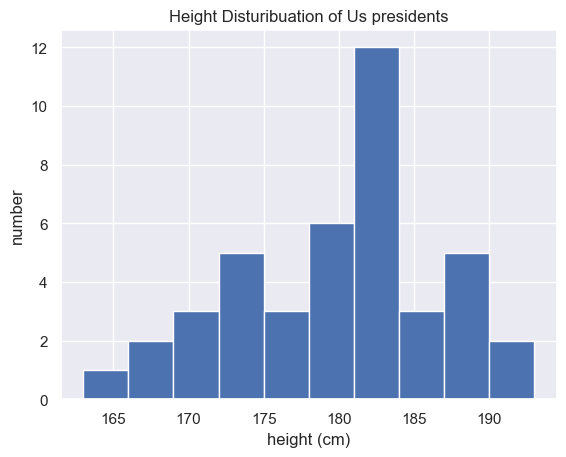

In [41]:
plt.hist(heights)
plt.title("Height Disturibuation of Us presidents")
plt.xlabel("height (cm)")
plt.ylabel("number")